## Pandas Crosstab Explained

Notebook that accompanies [article](http://pbpython.com/pandas-crosstab.html) on Practical Business Python

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

### Import the data

In [3]:
# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

In [4]:
# Read in the CSV file and convert "?" to NaN
df_raw = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df_raw.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
# Take a quick look at all the values in the data
df_raw.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# Filter out the top 8 manufacturers
models = ["toyota","nissan","mazda", "honda", "mitsubishi", "subaru", "volkswagen", "volvo"]

In [7]:
df = df_raw[df_raw.make.isin(models)].copy()

In [8]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
30,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0
31,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,31,38,6855.0
32,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.1,60.0,5500.0,38,42,5399.0
33,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,6529.0
34,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,7129.0


In [9]:
### Basic Crosstab functions

In [10]:
# Create a simple crosstab that counts the number of occurences of each combination
pd.crosstab(df.make, df.num_doors)

num_doors,four,two
make,,
honda,5,8
mazda,7,9
mitsubishi,4,9
nissan,9,9
subaru,9,3
toyota,18,14
volkswagen,8,4
volvo,11,0


In [11]:
# Add a subtotal
pd.crosstab(df.make, df.num_doors, margins=True, margins_name="Total")

num_doors,four,two,Total
make,,,
honda,5,8,13
mazda,7,9,16
mitsubishi,4,9,13
nissan,9,9,18
subaru,9,3,12
toyota,18,14,32
volkswagen,8,4,12
volvo,11,0,11
Total,71,56,127


In [12]:
# Another example, this time of make and body_style
pd.crosstab(df.make, df.body_style)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0,0,7,5,1
mazda,0,0,10,7,0
mitsubishi,0,0,9,4,0
nissan,0,1,5,9,3
subaru,0,0,3,5,4
toyota,1,3,14,10,4
volkswagen,1,0,1,9,1
volvo,0,0,0,8,3


In [13]:
# Add custom names for the rows and columns?
pd.crosstab(df.make, df.body_style, rownames=['Auto Manufacturer'], colnames=['Body Style'])

Body Style,convertible,hardtop,hatchback,sedan,wagon
Auto Manufacturer,,,,,
honda,0,0,7,5,1
mazda,0,0,10,7,0
mitsubishi,0,0,9,4,0
nissan,0,1,5,9,3
subaru,0,0,3,5,4
toyota,1,3,14,10,4
volkswagen,1,0,1,9,1
volvo,0,0,0,8,3


### Normalizing Results

In [14]:
# Convert the occurrences to percentages
pd.crosstab(df.make, df.body_style, normalize=True)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.000000,0.000000,0.054688,0.039062,0.007812
mazda,0.000000,0.000000,0.078125,0.054688,0.000000
mitsubishi,0.000000,0.000000,0.070312,0.031250,0.000000
nissan,0.000000,0.007812,0.039062,0.070312,0.023438
subaru,0.000000,0.000000,0.023438,0.039062,0.031250
toyota,0.007812,0.023438,0.109375,0.078125,0.031250
volkswagen,0.007812,0.000000,0.007812,0.070312,0.007812
volvo,0.000000,0.000000,0.000000,0.062500,0.023438


In [15]:
# Convert the occurrences to percentages for each row
pd.crosstab(df.make, df.body_style, normalize='index')

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.000000,0.000000,0.538462,0.384615,0.076923
mazda,0.000000,0.000000,0.588235,0.411765,0.000000
mitsubishi,0.000000,0.000000,0.692308,0.307692,0.000000
nissan,0.000000,0.055556,0.277778,0.500000,0.166667
subaru,0.000000,0.000000,0.250000,0.416667,0.333333
toyota,0.031250,0.093750,0.437500,0.312500,0.125000
volkswagen,0.083333,0.000000,0.083333,0.750000,0.083333
volvo,0.000000,0.000000,0.000000,0.727273,0.272727


In [16]:
# Convert the occurrences to percentages for each column
pd.crosstab(df.make, df.body_style, normalize='columns')

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.0,0.00,0.142857,0.087719,0.0625
mazda,0.0,0.00,0.204082,0.122807,0.0000
mitsubishi,0.0,0.00,0.183673,0.070175,0.0000
nissan,0.0,0.25,0.102041,0.157895,0.1875
subaru,0.0,0.00,0.061224,0.087719,0.2500
toyota,0.5,0.75,0.285714,0.175439,0.2500
volkswagen,0.5,0.00,0.020408,0.157895,0.0625
volvo,0.0,0.00,0.000000,0.140351,0.1875


In [17]:
# If you want to make the percentages a little easier to see, multiple all values by 100
pd.crosstab(df.make, df.body_style, normalize='columns').mul(100).round(0)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.0,0.0,14.0,9.0,6.0
mazda,0.0,0.0,20.0,12.0,0.0
mitsubishi,0.0,0.0,18.0,7.0,0.0
nissan,0.0,25.0,10.0,16.0,19.0
subaru,0.0,0.0,6.0,9.0,25.0
toyota,50.0,75.0,29.0,18.0,25.0
volkswagen,50.0,0.0,2.0,16.0,6.0
volvo,0.0,0.0,0.0,14.0,19.0


### Custom Aggregations and Grouping

In [18]:
# Perform aggregation functions - not just a simple count
pd.crosstab(df.make, df.body_style, values=df.curb_weight, aggfunc='mean').round(0)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,NaN,NaN,1970.0,2289.0,2024.0
mazda,NaN,NaN,2254.0,2361.0,NaN
mitsubishi,NaN,NaN,2377.0,2394.0,NaN
nissan,NaN,2008.0,2740.0,2238.0,2452.0
subaru,NaN,NaN,2137.0,2314.0,2454.0
toyota,2975.0,2585.0,2370.0,2338.0,2708.0
volkswagen,2254.0,NaN,2221.0,2342.0,2563.0
volvo,NaN,NaN,NaN,3023.0,3078.0


In [19]:
pd.crosstab(df.make, [df.body_style, df.drive_wheels], values=df.curb_weight, aggfunc='mean').fillna('-')

body_style   convertible       hardtop       hatchback                    \
drive_wheels         fwd   rwd     fwd   rwd       4wd      fwd      rwd   
make                                                                       
honda                  -     -       -     -         -     1970        -   
mazda                  -     -       -     -         -  2148.33  2411.25   
mitsubishi             -     -       -     -         -  2376.56        -   
nissan                 -     -    2008     -         -     2176  3116.33   
subaru                 -     -       -     -      2240     2085        -   
toyota                 -  2975       -  2585         -  2177.25  2626.83   
volkswagen          2254     -       -     -         -     2221        -   
volvo                  -     -       -     -         -        -        -   

body_style     sedan                   wagon                    
drive_wheels     4wd      fwd      rwd   4wd      fwd      rwd  
make                                                            
honda              -   2288.8        -     -     2024        -  
mazda              -   2231.6     2685     -        -        -  
mitsubishi         -     2394        -     -        -        -  
nissan             -  2237.89        -     -  2452.33        -  
subaru        2447.5     2225        -  2535   2372.5        -  
toyota             -  2258.57  2521.67  2700     2280     3151  
volkswagen         -  2342.22        -     -     2563        -  
volvo              -        -     3023     -        -  3077.67

In [20]:
# Crosstab supports grouping as well. In this case, group the columns
pd.crosstab(df.make, [df.body_style, df.drive_wheels])

body_style   convertible     hardtop     hatchback         sedan          \
drive_wheels         fwd rwd     fwd rwd       4wd fwd rwd   4wd fwd rwd   
make                                                                       
honda                  0   0       0   0         0   7   0     0   5   0   
mazda                  0   0       0   0         0   6   4     0   5   2   
mitsubishi             0   0       0   0         0   9   0     0   4   0   
nissan                 0   0       1   0         0   2   3     0   9   0   
subaru                 0   0       0   0         1   2   0     2   3   0   
toyota                 0   1       0   3         0   8   6     0   7   3   
volkswagen             1   0       0   0         0   1   0     0   9   0   
volvo                  0   0       0   0         0   0   0     0   0   8   

body_style   wagon          
drive_wheels   4wd fwd rwd  
make                        
honda            0   1   0  
mazda            0   0   0  
mitsubishi       0   0   0  
nissan           0   3   0  
subaru           2   2   0  
toyota           2   1   1  
volkswagen       0   1   0  
volvo            0   0   3

In [21]:
# A more complex example showing the grouping of rows and columns
pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels], 
            rownames=['Auto Manufacturer', "Doors"], 
            colnames=['Body Style', "Drive Type"], 
            dropna=False)

Body Style              convertible         hardtop         hatchback          \
Drive Type                      4wd fwd rwd     4wd fwd rwd       4wd fwd rwd   
Auto Manufacturer Doors                                                         
honda             four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   7   0   
mazda             four            0   0   0       0   0   0         0   1   0   
                  two             0   0   0       0   0   0         0   5   4   
mitsubishi        four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   9   0   
nissan            four            0   0   0       0   0   0         0   1   0   
                  two             0   0   0       0   1   0         0   1   3   
subaru            four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         1   2   0   
toyota            four            0   0   0       0   0   0         0   6   0   
                  two             0   0   1       0   0   3         0   2   6   
volkswagen        four            0   0   0       0   0   0         0   0   0   
                  two             0   1   0       0   0   0         0   1   0   
volvo             four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   0   0   

Body Style              sedan         wagon          
Drive Type                4wd fwd rwd   4wd fwd rwd  
Auto Manufacturer Doors                              
honda             four      0   4   0     0   1   0  
                  two       0   1   0     0   0   0  
mazda             four      0   4   2     0   0   0  
                  two       0   0   0     0   0   0  
mitsubishi        four      0   4   0     0   0   0  
                  two       0   0   0     0   0   0  
nissan            four      0   5   0     0   3   0  
                  two       0   4   0     0   0   0  
subaru            four      2   3   0     2   2   0  
                  two       0   0   0     0   0   0  
toyota            four      0   7   1     2   1   1  
                  two       0   0   2     0   0   0  
volkswagen        four      0   7   0     0   1   0  
                  two       0   2   0     0   0   0  
volvo             four      0   0   8     0   0   3  
                  two       0   0   0     0   0   0

In [22]:
# You can also use agg functions when grouping
pd.crosstab(df.make, [df.body_style, df.drive_wheels], values=df.curb_weight, aggfunc='mean').fillna('-')

body_style   convertible       hardtop       hatchback                    \
drive_wheels         fwd   rwd     fwd   rwd       4wd      fwd      rwd   
make                                                                       
honda                  -     -       -     -         -     1970        -   
mazda                  -     -       -     -         -  2148.33  2411.25   
mitsubishi             -     -       -     -         -  2376.56        -   
nissan                 -     -    2008     -         -     2176  3116.33   
subaru                 -     -       -     -      2240     2085        -   
toyota                 -  2975       -  2585         -  2177.25  2626.83   
volkswagen          2254     -       -     -         -     2221        -   
volvo                  -     -       -     -         -        -        -   

body_style     sedan                   wagon                    
drive_wheels     4wd      fwd      rwd   4wd      fwd      rwd  
make                                                            
honda              -   2288.8        -     -     2024        -  
mazda              -   2231.6     2685     -        -        -  
mitsubishi         -     2394        -     -        -        -  
nissan             -  2237.89        -     -  2452.33        -  
subaru        2447.5     2225        -  2535   2372.5        -  
toyota             -  2258.57  2521.67  2700     2280     3151  
volkswagen         -  2342.22        -     -     2563        -  
volvo              -        -     3023     -        -  3077.67

In [23]:
# You can also use margins when grouping
pd.crosstab(df.make, [df.body_style, df.drive_wheels], 
            values=df.curb_weight, aggfunc='mean', margins=True,
            margins_name='Average').fillna('-').round(0)

body_style   convertible       hardtop       hatchback                    \
drive_wheels         fwd   rwd     fwd   rwd       4wd      fwd      rwd   
make                                                                       
honda                  -     -       -     -         -     1970        -   
mazda                  -     -       -     -         -  2148.33  2411.25   
mitsubishi             -     -       -     -         -  2376.56        -   
nissan                 -     -    2008     -         -     2176  3116.33   
subaru                 -     -       -     -      2240     2085        -   
toyota                 -  2975       -  2585         -  2177.25  2626.83   
volkswagen          2254     -       -     -         -     2221        -   
volvo                  -     -       -     -         -        -        -   
Average             2254  2975    2008  2585      2240     2178  2673.46   

body_style     sedan                     wagon                   Average  
drive_wheels     4wd      fwd      rwd     4wd      fwd      rwd          
make                                                                      
honda              -   2288.8        -       -     2024        -  2097.0  
mazda              -   2231.6     2685       -        -        -  2298.0  
mitsubishi         -     2394        -       -        -        -  2382.0  
nissan             -  2237.89        -       -  2452.33        -  2400.0  
subaru        2447.5     2225        -    2535   2372.5        -  2316.0  
toyota             -  2258.57  2521.67    2700     2280     3151  2441.0  
volkswagen         -  2342.22        -       -     2563        -  2343.0  
volvo              -        -     3023       -        -  3077.67  3038.0  
Average       2447.5  2282.95  2855.31  2617.5  2371.12     3096  2406.0

### Visualizing results with Seaborn

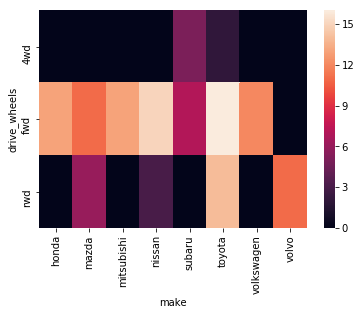

In [24]:
# Seaborn's heatmap can visualize the final results of the crosstab
sns.heatmap(pd.crosstab(df.drive_wheels, df.make))

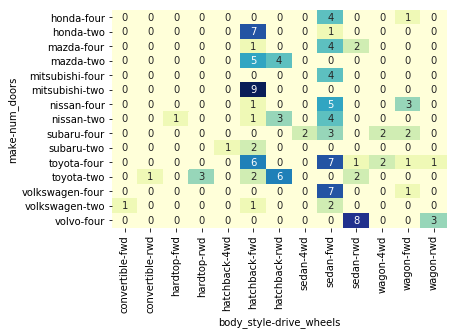

In [25]:
# This is a more complex customization of a heatmap
sns.heatmap(pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels]), cmap="YlGnBu", 
            annot=True, cbar=False)

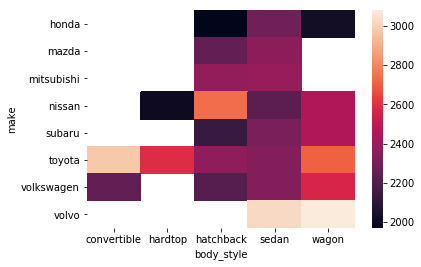

In [26]:
sns.heatmap(pd.crosstab(df.make, df.body_style, values=df.curb_weight, aggfunc='mean').round(0))

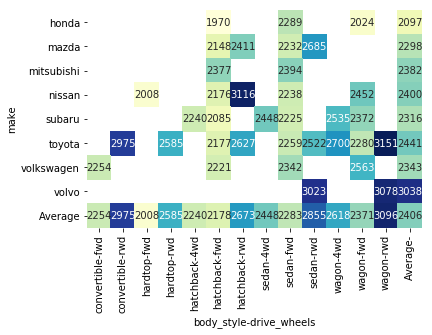

In [27]:
sns.heatmap(pd.crosstab(df.make, [df.body_style, df.drive_wheels], 
            values=df.curb_weight, aggfunc='mean', margins=True, margins_name='Average'),
           cmap="YlGnBu", annot=True, cbar=False, fmt='.0f')